In [1]:
!pip install nbimporter

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import nbimporter
from dataset import load_datasets 
from model import get_model  

In [3]:
import torch
import torch.optim as optim
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader, val_loader, test_loader = load_datasets("pedestrian_risk_analysis.csv")
model = get_model(device)

In [4]:
import torch
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
_loss_plot_test=[]

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss, correct = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
    
    avg_loss = total_loss/ len(train_loader.dataset)
    train_accuracy = correct / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Accuracy: {train_accuracy:.4f}")
    with torch.no_grad():
        prediction, truth = zip(*[(model(x.to(device)), y.to(device)) for x, y in val_loader])
        prediction = torch.cat(prediction, dim=0)
        truth = torch.cat(truth, dim=0)
        val_loss = loss_fn(prediction, truth)
        _loss_plot_test.append(val_loss.item())
        
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f} Val Loss: {val_loss:.4f}")

Epoch [1/10], Loss: 193.2038, Accuracy: 0.6804
Epoch [1/10] - Loss: 0.0224 Val Loss: 0.5338
Epoch [2/10], Loss: 120.7394, Accuracy: 0.8144
Epoch [2/10] - Loss: 0.0140 Val Loss: 0.3475
Epoch [3/10], Loss: 92.4098, Accuracy: 0.8640
Epoch [3/10] - Loss: 0.0107 Val Loss: 0.3109
Epoch [4/10], Loss: 73.0115, Accuracy: 0.8880
Epoch [4/10] - Loss: 0.0085 Val Loss: 0.2987
Epoch [5/10], Loss: 62.5265, Accuracy: 0.9041
Epoch [5/10] - Loss: 0.0073 Val Loss: 0.2699
Epoch [6/10], Loss: 56.3052, Accuracy: 0.9142
Epoch [6/10] - Loss: 0.0065 Val Loss: 0.2756
Epoch [7/10], Loss: 52.8172, Accuracy: 0.9201
Epoch [7/10] - Loss: 0.0061 Val Loss: 0.2684
Epoch [8/10], Loss: 44.9489, Accuracy: 0.9305
Epoch [8/10] - Loss: 0.0052 Val Loss: 0.2708
Epoch [9/10], Loss: 43.6424, Accuracy: 0.9339
Epoch [9/10] - Loss: 0.0051 Val Loss: 0.2252
Epoch [10/10], Loss: 38.6034, Accuracy: 0.9406
Epoch [10/10] - Loss: 0.0045 Val Loss: 0.2614


In [5]:
lookup_dict={
    0 :'Low',
    1 :'Medium',
    2 :'High'}

In [7]:
import numpy as np
with torch.no_grad():
    model.eval()
    prediction,truth,imgs=zip(*[(torch.softmax(model(x.to(device)),axis=1),y,x) for x,y in test_loader])

prediction=torch.cat(prediction,dim=0).cpu().numpy()
truth=torch.cat(truth,dim=0).cpu().numpy()
imgs=torch.cat(imgs,dim=0).cpu().numpy()
predicted_labels=np.argmax(prediction,axis=1)

<Axes: >

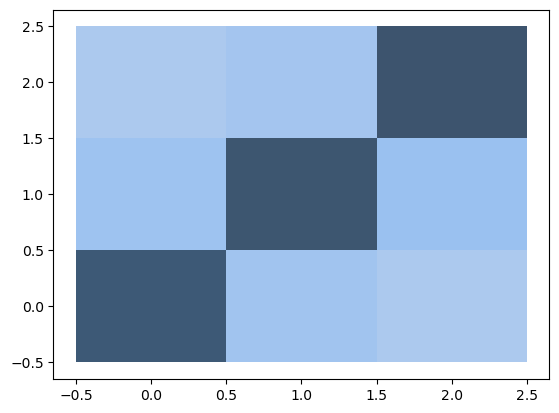

In [24]:
import seaborn as sns
sns.histplot(x=predicted_labels,y=truth,discrete=True,bins=20)

----------------- 723 -----------------
Predicted Probability 1.00 Class 0 Low
True Class 1 Medium
(3, 128, 128)


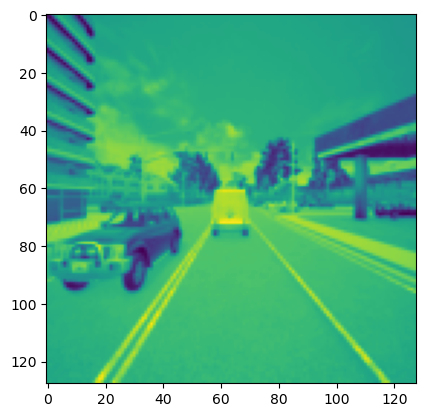

----------------- 786 -----------------
Predicted Probability 1.00 Class 2 High
True Class 1 Medium
(3, 128, 128)


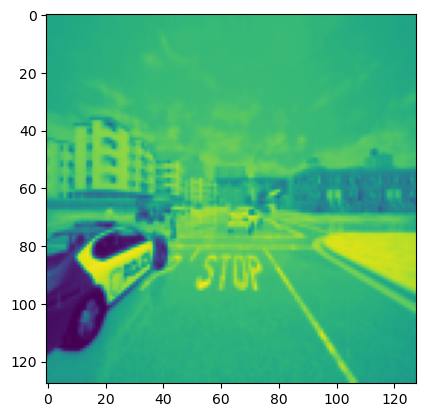

----------------- 483 -----------------
Predicted Probability 1.00 Class 2 High
True Class 1 Medium
(3, 128, 128)


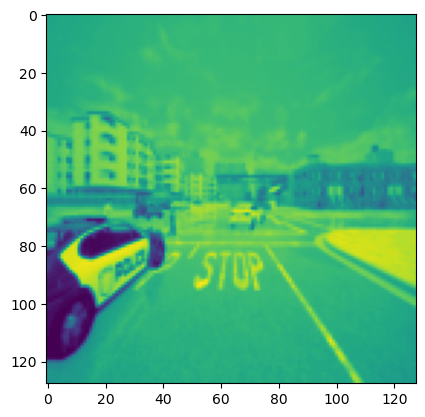

----------------- 673 -----------------
Predicted Probability 1.00 Class 1 Medium
True Class 0 Low
(3, 128, 128)


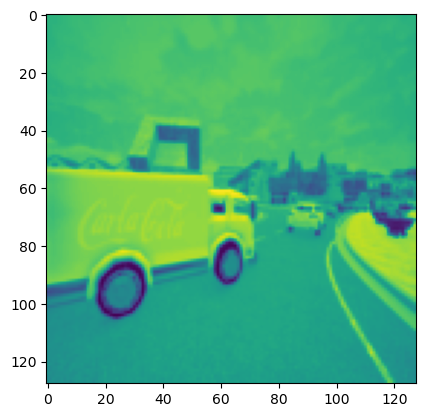

----------------- 879 -----------------
Predicted Probability 0.99 Class 2 High
True Class 1 Medium
(3, 128, 128)


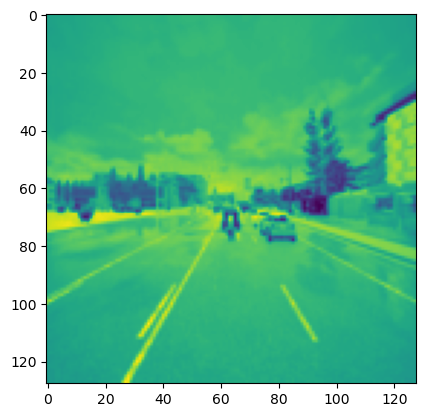

----------------- 975 -----------------
Predicted Probability 0.98 Class 2 High
True Class 1 Medium
(3, 128, 128)


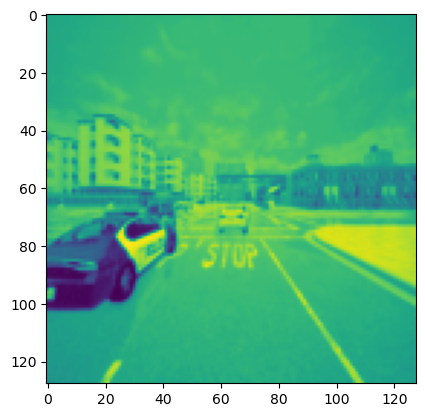

----------------- 896 -----------------
Predicted Probability 0.97 Class 2 High
True Class 1 Medium
(3, 128, 128)


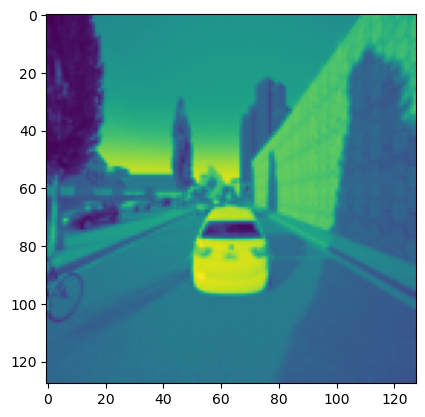

----------------- 705 -----------------
Predicted Probability 0.97 Class 0 Low
True Class 1 Medium
(3, 128, 128)


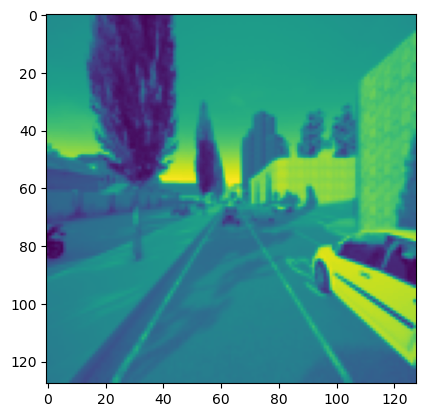

----------------- 380 -----------------
Predicted Probability 0.96 Class 1 Medium
True Class 0 Low
(3, 128, 128)


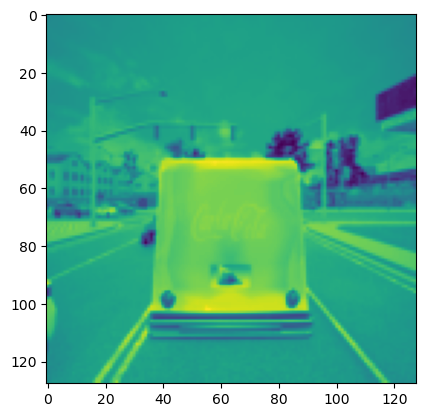

----------------- 401 -----------------
Predicted Probability 0.95 Class 0 Low
True Class 1 Medium
(3, 128, 128)


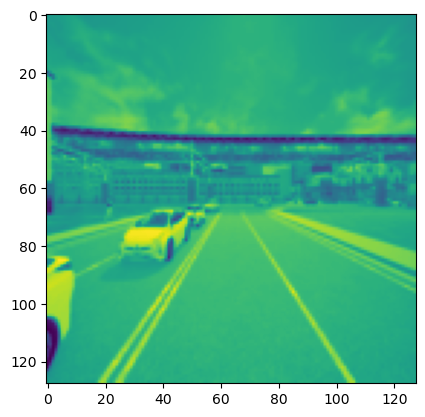

In [25]:
import matplotlib.pyplot as plt

wrong= (predicted_labels != truth)
sorted_prediction=np.flip(np.argsort(prediction.max(axis=1)))

worst_predictions= [i for i in sorted_prediction if wrong[i]]

for index in worst_predictions[0:10]:
    
    print("-----------------",index,"-----------------")
    print(f"Predicted Probability {prediction[index].max().item():.2f}", 'Class' ,predicted_labels[index], lookup_dict[predicted_labels[index]])
    print("True Class",truth[index], lookup_dict[truth[index]])
    _plot_img=imgs[index]
    print(_plot_img.shape)
    plt.imshow(_plot_img[0])
    plt.show()
    
